In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing 

print('Libraries Imported')

Libraries Imported


In [2]:
col_list = ["Date"," Time"," EpochTime"," LogOp"," Pid"," package"," freeMemory"," CpuTime"," ProcessCpuLoad"," CurrentThreadCpuTime"," CurrentThreaduserTime"," SystemLoadAverage"," UserId"," TimeDiff"," Error"," Message"," Outcome"]
dataset = pd.read_csv("final_data2.csv", usecols=col_list)
print('Shape of the dataset: ' + str(dataset.shape))
print(dataset.head())

Shape of the dataset: (198452, 17)
         Date          Time      EpochTime  LogOp    Pid  \
0  2020-07-30  22:10:27.063  1596127227063   INFO  63647   
1  2020-07-30  22:10:27.067  1596127227067   INFO  63647   
2  2020-07-30  22:10:27.067  1596127227067   INFO  63647   
3  2020-07-30  22:10:27.067  1596127227067   INFO  63647   
4  2020-07-30  22:10:27.067  1596127227067   INFO  63647   

                          package  freeMemory      CpuTime  \
0  com.dev.kgf.ApplicationStarter   643836128  65660059000   
1  com.dev.kgf.ApplicationStarter   643836128  65667444000   
2  com.dev.kgf.ApplicationStarter   643836128  65667509000   
3  com.dev.kgf.ApplicationStarter   643836128  65667551000   
4  com.dev.kgf.ApplicationStarter   643836128  65667599000   

         ProcessCpuLoad  CurrentThreadCpuTime  CurrentThreaduserTime  \
0                0.0625            5940593000             4914928000   
1    0.1332972582972583            5942996000             4915261000   
2    0.06461864

/Users/jyotsana.j/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6,7,8,9,10,11,12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset=dataset.rename(columns=lambda x: x.strip())
dataset=dataset.drop(columns=['EpochTime','LogOp','Date','Time','Pid','package','UserId','Error',"Message"])
dataset=dataset[(dataset['Outcome']!='initialUrl=https://community.etsy.com/ndggd45364/restapi/vc/authentication/sessions/login] manageUser=null]')]
dataset.head()

,freeMemory,CpuTime,ProcessCpuLoad,CurrentThreadCpuTime,CurrentThreaduserTime,SystemLoadAverage,TimeDiff,Outcome
0,643836128,65660059000,0.0625,5940593000,4914928000,3.66015625,0.0,30
1,643836128,65667444000,0.1332972582972583,5942996000,4915261000,3.66015625,4.0,0
2,643836128,65667509000,0.0646186440677966,5943055000,4915299000,3.66015625,0.0,0
3,643836128,65667551000,0.0625,5943095000,4915322000,3.66015625,0.0,0
4,643836128,65667599000,0.06380208333333333,5943143000,4915346000,3.66015625,0.0,0


In [4]:
dataset.head()

,freeMemory,CpuTime,ProcessCpuLoad,CurrentThreadCpuTime,CurrentThreaduserTime,SystemLoadAverage,TimeDiff,Outcome
0,643836128,65660059000,0.0625,5940593000,4914928000,3.66015625,0.0,30
1,643836128,65667444000,0.1332972582972583,5942996000,4915261000,3.66015625,4.0,0
2,643836128,65667509000,0.0646186440677966,5943055000,4915299000,3.66015625,0.0,0
3,643836128,65667551000,0.0625,5943095000,4915322000,3.66015625,0.0,0
4,643836128,65667599000,0.06380208333333333,5943143000,4915346000,3.66015625,0.0,0


In [5]:
dataset.Outcome.unique()

array(['30', '0', '90', '100', nan, 0.0, 30.0, 90.0, 100.0, 60.0],
      dtype=object)

In [6]:
dataset.replace(' ', np.nan, inplace= True)
dataset.dropna(inplace=True)

In [7]:
for col in dataset[dataset.columns[0:8]]:
    dataset[col]=pd.to_numeric(dataset[col])

In [8]:
for col in dataset[dataset.columns[0:8]]:
    dataset[col]=dataset[col].interpolate(method='pad')

In [9]:
dataset['Outcome'] = dataset['Outcome'].astype(int)
dataset.Outcome.unique()

array([ 30,   0,  90, 100,  60])

In [10]:
dataset['Outcome']=dataset['Outcome'].replace(100,4)
dataset['Outcome']=dataset['Outcome'].replace(90,3)
dataset['Outcome']=dataset['Outcome'].replace(60,2)
dataset['Outcome']=dataset['Outcome'].replace(30,1)
dataset['Outcome']=dataset['Outcome'].replace(0,0)

In [11]:
dataset.Outcome.unique()

array([1, 0, 3, 4, 2])

In [12]:
dataset.head()

,freeMemory,CpuTime,ProcessCpuLoad,CurrentThreadCpuTime,CurrentThreaduserTime,SystemLoadAverage,TimeDiff,Outcome
0,643836128,65660059000,0.062500,5940593000,4914928000,3.660156,0.0,1
1,643836128,65667444000,0.133297,5942996000,4915261000,3.660156,4.0,0
2,643836128,65667509000,0.064619,5943055000,4915299000,3.660156,0.0,0
3,643836128,65667551000,0.062500,5943095000,4915322000,3.660156,0.0,0
4,643836128,65667599000,0.063802,5943143000,4915346000,3.660156,0.0,0


In [13]:
dataset.Outcome.value_counts()

0    195935
3       215
1        28
4        14
2         3
Name: Outcome, dtype: int64

In [14]:
x = dataset.drop('Outcome', axis = 1)
x[0:5]

,freeMemory,CpuTime,ProcessCpuLoad,CurrentThreadCpuTime,CurrentThreaduserTime,SystemLoadAverage,TimeDiff
0,643836128,65660059000,0.062500,5940593000,4914928000,3.660156,0.0
1,643836128,65667444000,0.133297,5942996000,4915261000,3.660156,4.0
2,643836128,65667509000,0.064619,5943055000,4915299000,3.660156,0.0
3,643836128,65667551000,0.062500,5943095000,4915322000,3.660156,0.0
4,643836128,65667599000,0.063802,5943143000,4915346000,3.660156,0.0


In [15]:
y = dataset[["Outcome"]]
y[0:5]

,Outcome
0,1
1,0
2,0
3,0
4,0


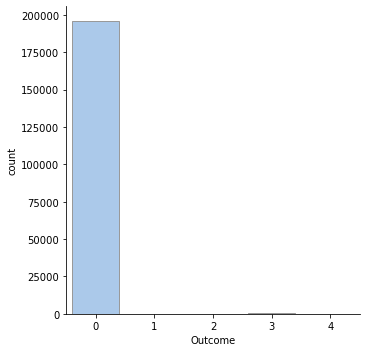

In [16]:
import seaborn as sn

sn.catplot(x="Outcome", kind="count",palette="pastel", edgecolor=".6",data=dataset,height=5,aspect=1,orient='h')

In [17]:
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x,y,stratify=y, test_size=0.2, random_state=3)

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit(x_trainset)

In [19]:
new_df = X_scaled.transform(x_trainset)
x_trainset = pd.DataFrame(new_df)
new_df1 = X_scaled.transform(x_testset)
x_testset = pd.DataFrame(new_df1)

In [20]:
x_trainset.describe()

,0,1,2,3,4,5,6
count,156956.000000,156956.000000,156956.000000,156956.000000,156956.000000,156956.000000,156956.000000
mean,0.432774,0.182663,0.009270,0.600237,0.642048,0.621172,0.000163
std,0.213338,0.068634,0.025968,0.168526,0.175641,0.195961,0.005223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251756,0.140473,0.003148,0.476876,0.501594,0.435603,0.000000
50%,0.416209,0.183997,0.003256,0.564801,0.595954,0.613620,0.000000
75%,0.584447,0.223046,0.006296,0.730377,0.803338,0.753425,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
factor = pd.factorize(dataset['Outcome'])
dataset.Outcome = factor[0]
definitions = factor[1]
print(dataset.Outcome.head())
print(definitions)
dataset.Outcome.unique()

0    0
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64
Int64Index([1, 0, 3, 4, 2], dtype='int64')


array([0, 1, 2, 3, 4])

In [26]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_trainset, y_trainset.values.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [27]:
y_pred = classifier.predict(x_testset)

In [28]:
reversefactor = dict(zip(range(5),definitions))

In [29]:
y_testset = np.vectorize(reversefactor.get)(y_testset)

In [30]:
y_pred = np.vectorize(reversefactor.get)(y_pred)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_testset,y_pred,labels=[0, 30, 60, 90,100]))
print(classification_report(y_testset,y_pred,labels=[0, 30, 60, 90,100]))
print(accuracy_score(y_testset, y_pred))

[[1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
          30       0.00      0.00      0.00         0
          60       0.00      0.00      0.00         0
          90       0.00      0.00      0.00         0
         100       0.00      0.00      0.00         0

   micro avg       0.33      0.17      0.22         6
   macro avg       0.07      0.03      0.04         6
weighted avg       0.33      0.17      0.22         6

0.9998216060552002


/Users/jyotsana.j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jyotsana.j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[    1     5     0     0]
 [    2 39185     0     0]
 [    0     0     3     0]
 [    0     0     0    43]]


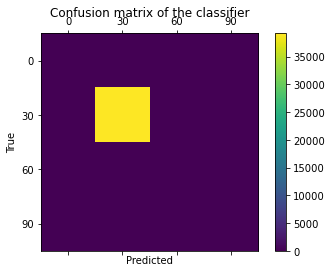

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
labels = ['0','30','60','90','100']
cm = confusion_matrix(y_testset,y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [33]:
import pickle
pickle.dump(classifier,open('random_forest.pkl','wb'))
pickle.dump(X_scaled,open('minMax.pkl','wb'))